In [82]:
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np
import itertools
import pandas as pd
import math
from scipy.signal import get_window
import scipy
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 
import glob
import pickle
import joblib
from sklearn.metrics import f1_score
import soundfile
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
def calculate_delta(array):
    rows,cols = array.shape
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
                first =0
            else:
                first = i-j
            if i+j > rows-1:
                second = rows-1
            else:
                second = i+j 
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas

# Feature Extraction for both train and test data

def extract_features_for_data(audio,sr):
    mfcc_feature = mfcc.mfcc(audio,sr, 0.025, 0.01,20, nfft = 1200 ,appendEnergy=True)
    mfcc_feature = preprocessing.scale(mfcc_feature)
    delta = calculate_delta(mfcc_feature)
    combined = np.hstack((mfcc_feature,delta)) 
    return combined, mfcc_feature


def gmm_dist(mfcc, speaker):
    plt.style.use('ggplot')
    fig = plt.figure(facecolor='#C5E5EC')
    plt.xlabel("MFCC", {'color': '#104374'})
    plt.yticks(color = '#104374')
    plt.xticks(color = '#104374')
    if speaker == 0:
        sns.distplot(mfcc, color = 'blue', hist=False)
        # x = ax.lines[0].get_xdata() # Get the x data of the distribution
        # y = ax.lines[0].get_ydata() # Get the y data of the distribution
        # ax.set_xlim(-3,3)
        # maxid = np.argmax(y)
        # plt.axvline(x=x[maxid] - 0.1, color='b', linestyle='--')
        # ax.annotate(text = str((x[maxid] - 0.1))[:5] , xy= (x[maxid] - 0.8,0.4))
        # plt.axvline(x=x[maxid] + 0.1, color='b', linestyle='--')
        # ax.annotate(text = str((x[maxid] + 0.1))[:5] , xy= (x[maxid] + 0.3,0.4))
        plt.title('Gehad', color = '#104374')
        plt.tight_layout()
        plt.savefig('D:\Edu\DSP\Tasks\Task3\\task3_gmm\static\img\gehad_dist.png')
    elif speaker == 1:
        sns.distplot(mfcc, color = 'red', hist=False)
        # x = ax.lines[0].get_xdata() # Get the x data of the distribution
        # y = ax.lines[0].get_ydata() # Get the y data of the distribution
        # maxid = np.argmax(y)
        # plt.axvline(x=x[maxid] - 0.1, color='b', linestyle='--')
        # ax.annotate(text = str((x[maxid] - 0.1))[:5] , xy= (x[maxid] - 0.8,0.4))
        # plt.axvline(x=x[maxid] + 0.1, color='b', linestyle='--')
        # ax.annotate(text = str((x[maxid] + 0.1))[:5] , xy= (x[maxid] + 0.3,0.4))
        plt.title('Rawan', color = '#104374')
        plt.tight_layout()
        plt.savefig('D:\Edu\DSP\Tasks\Task3\\task3_gmm\static\img\\rawan_dist.png')
    elif speaker == 2:
        sns.distplot(mfcc, color = 'green', hist=False)
        # x = ax.lines[0].get_xdata() # Get the x data of the distribution
        # y = ax.lines[0].get_ydata() # Get the y data of the distribution
        # maxid = np.argmax(y)
        # plt.axvline(x=x[maxid] - 0.1, color='b', linestyle='--')
        # ax.annotate(text = str((x[maxid] - 0.1))[:5] , xy= (x[maxid] - 0.8,0.4))
        # plt.axvline(x=x[maxid] + 0.1, color='b', linestyle='--')
        # ax.annotate(text = str((x[maxid] + 0.1))[:5] , xy= (x[maxid] + 0.3,0.4))
        plt.title('Sohaila', color = '#104374')
        plt.tight_layout()
        plt.savefig('D:\Edu\DSP\Tasks\Task3\\task3_gmm\static\img\sohaila_dist.png')



[[-4.04991871 -0.69053053 -0.55414489 ... -0.02415636 -0.21832274
   0.12849358]
 [-3.16721234 -1.65245979 -1.45816752 ... -0.18582356 -0.01626444
  -0.08043474]
 [-2.85068577 -1.62369452 -1.49082032 ... -0.10172757 -0.09734276
  -0.20878701]
 ...
 [ 0.03034662 -0.18747466 -0.73003915 ...  0.25300962 -0.20211332
  -0.09514681]
 [ 0.0777937  -0.07648974 -1.27234913 ...  0.26629379 -0.28037528
   0.12818287]
 [-0.15045497 -0.17489092 -1.29427232 ...  0.11339612 -0.23154222
   0.19030705]]
[[-3.73303711 -0.77550495 -1.47711819 ...  0.07201622  0.03718135
  -0.14367919]
 [-3.0880154  -0.33786081 -1.38268187 ... -0.0193673   0.02443064
  -0.03759282]
 [-2.47942581 -1.28241933 -0.82300246 ... -0.04502745 -0.05978845
   0.06765158]
 ...
 [-0.3768528  -0.60525346 -0.38075287 ... -0.09251712 -0.7869212
  -0.13305897]
 [-0.34754003 -0.61138896 -0.20951126 ... -0.13997473 -0.64277
   0.05435262]
 [-0.5853061  -0.55251079  0.02300862 ... -0.03212131 -0.19166178
   0.12308713]]
[[-3.79465418 -2.025

c:\Users\SOHILA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\SOHILA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\SOHILA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

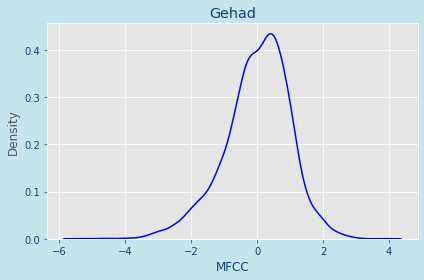

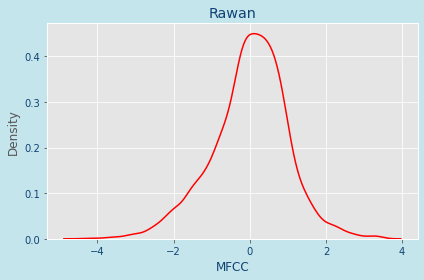

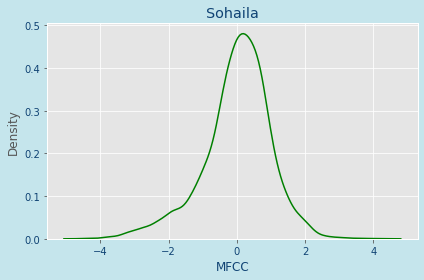

In [81]:
GfeaturesOpen = np.asarray(())
directory = './GehadOpen/'
for audio in os.listdir('./GehadOpen/'):
    audio_path = directory + audio
    sr,audio = read(audio_path)
    vector1, mfcc_g  = extract_features_for_data(audio,sr)
    print(vector1)
    if GfeaturesOpen.size == 0:
        GfeaturesOpen = vector1
    else:
        GfeaturesOpen=np.vstack((GfeaturesOpen, vector1 ))
gmm_dist(mfcc= mfcc_g, speaker= 0)

RfeaturesOpen = np.asarray(())
directory = './RawanOpen/'
for audio in os.listdir('./RawanOpen/'):
    audio_path = directory + audio
    sr,audio = read(audio_path)
    vector1, mfcc_r  = extract_features_for_data(audio,sr)
    if RfeaturesOpen.size == 0:
        RfeaturesOpen = vector1
    else:
        RfeaturesOpen=np.vstack((RfeaturesOpen, vector1 ))

gmm_dist(mfcc= mfcc_r, speaker= 1)

SfeaturesOpen = np.asarray(())
directory = './SohailaOpen/'
for audio in os.listdir('./SohailaOpen/'):
    audio_path = directory + audio
    sr,audio = read(audio_path)
    vector1 , mfcc_s = extract_features_for_data(audio,sr)
    if SfeaturesOpen.size == 0:
        SfeaturesOpen = vector1
    else:
        SfeaturesOpen=np.vstack((SfeaturesOpen, vector1))

gmm_dist(mfcc= mfcc_s, speaker= 2)

In [82]:
# GfeaturesOther = []
# directory = './GehadOther/'
# for audio in os.listdir('./GehadOther/'):
#     audio_path = directory + audio
#     GfeaturesOther=np.vstack(extract_features_for_data(audio_path) )

# RfeaturesOther = []
# directory = './RawanOther/'
# for audio in os.listdir('./RawanOther/'):
#     audio_path = directory + audio
#     RfeaturesOther=np.vstack(extract_features_for_data(audio_path) )

# SfeaturesOther = []
# directory = './SohailaOther/'
# for audio in os.listdir('./SohailaOther/'):
#     audio_path = directory + audio
#     SfeaturesOther=np.vstack(extract_features_for_data(audio_path) )



In [83]:
GehadOpen_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
GehadOpen_gmm.fit(GfeaturesOpen)

RawanOpen_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
RawanOpen_gmm.fit(RfeaturesOpen)

SohailaOpen_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
SohailaOpen_gmm.fit(SfeaturesOpen)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

In [84]:
# GehadOther_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
# GehadOther_gmm.fit(GfeaturesOther)

# RawanOther_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
# RawanOther_gmm.fit(RfeaturesOther)

# SohailaOther_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
# SohailaOther_gmm.fit(SfeaturesOther)

In [85]:
pickle.dump(GehadOpen_gmm,open('GehadOpen.gmm','wb'))
pickle.dump(RawanOpen_gmm,open('RawanOpen.gmm','wb'))
pickle.dump(SohailaOpen_gmm,open('SohailaOpen.gmm','wb'))

In [86]:
# pickle.dump(GehadOther_gmm,open('GehadOther.gmm','wb'))
# pickle.dump(RawanOther_gmm,open('RawanOther.gmm','wb'))
# pickle.dump(SohailaOther_gmm,open('SohailaOther.gmm','wb'))

In [87]:
lstFolders1 = ['GehadOpen', 'RawanOpen', 'SohailaOpen']
modelsOpen = [joblib.load(f + '.gmm') for f in lstFolders1]

In [88]:
modelsOpen

[GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3),
 GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3),
 GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)]

In [89]:
# lstFolders2 = ['GehadOther', 'RawanOther', 'SohailaOther']
# modelsOther = [joblib.load(f + '.gmm') for f in lstFolders2]

In [90]:
# modelsOther

In [91]:
y1 = []
y1_true = []
lstFolders1 = ['GehadOpen', 'RawanOpen', 'SohailaOpen']
for folder in lstFolders1:
    # try:
        lstFiles = glob.glob('./{}/*'.format(folder))
        for f in lstFiles:
            sr,audio = read(audio_path)
            vstack = extract_features_for_data(audio, sr)
            output = []
            for model in modelsOpen:
                scores = np.array(model.score(vstack))
                output.append(scores.sum())

            winner1 = np.argmax(output)
            y1_true.append(winner1)
            y1.append(lstFolders1.index(folder))
    

In [92]:
f1_score(y1, y1_true, average='micro')

0.3333333333333333

In [93]:
# y2 = []
# y2_true = []
# lstFolders2 = ['GehadOther', 'RawanOther', 'SohailaOther']
# for folder in lstFolders2:
#     # try:
#         lstFiles = glob.glob('./{}/*'.format(folder))
#         for f in lstFiles:
#             vstack = extract_features_for_data(f)
#             output = []
#             for model in modelsOther:
#                 scores = np.array(model.score(vstack))
#                 output.append(scores.sum())

#             winner2 = np.argmax(output)
#             y2_true.append(winner2)
#             y2.append(lstFolders2.index(folder))
    

In [94]:
# f1_score(y2, y2_true, average='micro')

In [95]:
sr,audio = read('./GehadOpen/Gehad(5).wav')
test2 = extract_features_for_data(audio, sr)
sr,audio = read('./RawanOpen/Rawan(5).wav')
test3= extract_features_for_data(audio, sr)
sr,audio = read('./SohailaOpen/Sohaila(5).wav')
test4 = extract_features_for_data(audio, sr)

scores_1 = np.array(GehadOpen_gmm.score(test2))
scores_2 = np.array(RawanOpen_gmm.score(test3))
scores_3 = np.array(SohailaOpen_gmm.score(test4))

print(scores_1)
print(scores_2)
print(scores_3)

-15.824863259786285
-16.267819046010725
-18.33383191378796
